<a href="https://colab.research.google.com/github/YasirSohailGujjar/DeepLearning.AI-TensorFlow-Developer-Professional-Certificate_Practice/blob/main/C1_W2_Lab_1_beyond_hello_worlds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example


In [55]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [56]:
#Loading Fashion MNIST
fmnist=tf.keras.datasets.fashion_mnist

In [57]:
#Load training and test split data
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  50 193 184 147 114  92  52  31   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   3   0  38 255 236 228 255 255 255 255 255 225 239 122   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  12   0 105 242 216 222 222 222 225 235 235 236 249 212   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 

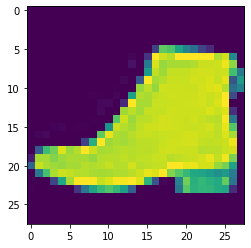

In [58]:
from tensorflow.python import training
#printing training images
import numpy as np
import matplotlib.pyplot as plt
#index from 0 to 5999
index=7000
#no. of characters per row while printing
np.set_printoptions(linewidth=320)

#print labels and images
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

#visualize image
plt.imshow(training_images[index])


In [59]:
#Normalizing for values b/w 0 to 1
training_images=training_images/255
test_images = test_images /255

In [60]:
#Building the classification model
model= tf.keras.Sequential([tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(128, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [61]:
#Sample input and convert to atensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function:{inputs.numpy()}')

input to softmax function:[[1. 3. 4. 2.]]


In [62]:
#Feed the inputs to a softmax activation function
outputs= tf.keras.activations.softmax(inputs)
print(f'output of softmax function:{outputs.numpy()}')

output of softmax function:[[0.0320586  0.23688282 0.64391426 0.08714432]]


In [63]:
#get sum of all values after softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

sum of outputs: 1.0


In [64]:
#Get the index with highest values
prediction=np.argmax(outputs)
print(f'class with highest probability: {prediction}')

class with highest probability: 2


In [66]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5016 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3798 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3385 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3157 - accuracy: 0.8835
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2983 - accuracy: 0.8912


# 89% accurate with loss 0.29 on training data

In [90]:
#Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3373


0.3373115062713623

In [ ]:
#87% accuracy on test data

In [91]:
#Exercise 1:
classifications = model.predict(test_images) # this is the function to predict any index in test images
print(classifications[0])  # in brackect [0] you can put values from 0 to 5999, then after running you will see 10 classifications below 
# if any classifuication from 0-9 have maximum probability then it will print that labels


313/313 [==============================] - 1s 4ms/step
[7.2446228e-06 3.5112791e-07 3.3077779e-07 5.3874590e-08 1.1197873e-06 5.1809144e-03 1.6468670e-05 5.5986632e-02 1.0244537e-05 9.3879664e-01]


In [92]:
print(test_labels[0])

9


In [ ]:
#Exercise 2:
#for 512 nerons, it takes more time but is more accurate, buts it's not a thumb rule


In [89]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4774
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3607
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3222
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3010
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[7.2446228e-06 3.5112791e-07 3.3077779e-07 5.3874590e-08 1.1197873e-06 5.1809144e-03 1.6468670e-05 5.5986632e-02 1.0244537e-05 9.3879664e-01]
9


In [95]:
#Exercise 3: Removing flatten layer, the code will not run, flatten command multiply 28*28 into 784*1 layer


In [94]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([           #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

In [ ]:
#Exercisr 4:
#If we try in final ouput layer with different value than 10


In [97]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax) # Try experimenting with this layer, final layer must have classes we defined as here are 10
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError: ignored

In [99]:
#Exercise 5:
mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    # Add a layer here,
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)  # Add a layer here, Here will be no effect but extra layers are usefull for complex data
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4679
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3559
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3227
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2986
Epoch 5/5
313/313 [==============================] - 1s 4ms/step
[1.7134693e-06 7.1578046e-07 1.3684797e-07 7.0213150e-07 3.0391354e-07 3.9576478e-03 5.2402891e-07 5.0000310e-02 8.8801890e-08 9.4603771e-01]
9


In [100]:
# Excercise 6:
# increasing no of epoches
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs, by increasing no of epoches the model may be overfit, so try this carefully

model.evaluate(test_images, test_labels)


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4944
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3742
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3358
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3103
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2938
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2685
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2570
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2486
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2379
Epoch 11/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2296
Epoch 12/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2245
E

0.3538844585418701

In [ ]:
#Exercise 7:


In [104]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

#training_images=training_images/255 # Experiment with removing this line
#test_images=test_images/255 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 5.0139
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5375
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5095
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4932
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[8.4191535e-13 1.0468318e-12 2.4896592e-18 2.0179193e-10 5.6826572e-15 8.7177254e-02 6.0055178e-15 4.0098187e-02 3.3360767e-08 8.7272459e-01]
9


In [ ]:
#Exercise 8:
#Callback Function: It is used to stop the epochs when we attain some accury like we stop by achieving accuracy of 60% 
#The function is below


In [106]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.6): # Experiment with changing this value
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])


Epoch 1/5
1873/1875 [============================>.] - ETA: 0s - loss: 0.4758 - accuracy: 0.8316
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4759 - accuracy: 0.8315
